# SVD  Разложение
## Метод наименьших квадратов


In [4]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [201]:
img = Image.open('/Users/stefan/Downloads/kick_butowski.jpg') 
width, height = img.size
print(width, height)

img = Image.open('/Users/stefan/Downloads/kick_butowski.jpg').resize((600, 400))

img.save(f"/Users/stefan/Downloads/kick_butowski.jpg")

600 400


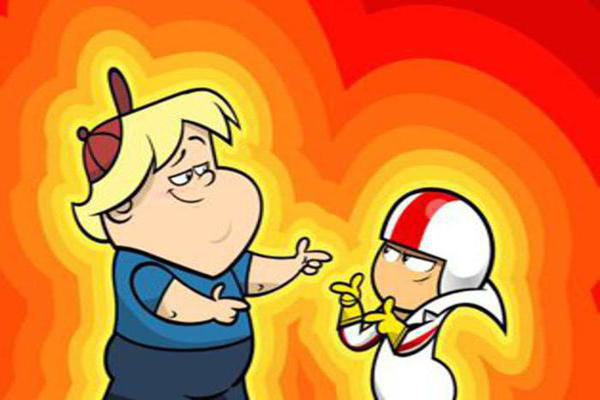

In [202]:
img

In [203]:
type(img) #тип данных оъект PIL

PIL.Image.Image

In [204]:
x = np.array(img, dtype=np.float64)

In [205]:
x

array([[[251.,  13.,  11.],
        [248.,  13.,  10.],
        [248.,  15.,  10.],
        ...,
        [198.,   5.,   6.],
        [197.,   4.,   5.],
        [194.,   4.,   4.]],

       [[251.,  13.,  11.],
        [248.,  13.,  10.],
        [248.,  15.,  10.],
        ...,
        [197.,   4.,   5.],
        [197.,   4.,   5.],
        [196.,   3.,   4.]],

       [[252.,  12.,  11.],
        [250.,  12.,  10.],
        [249.,  14.,  10.],
        ...,
        [198.,   4.,   5.],
        [197.,   4.,   5.],
        [196.,   3.,   4.]],

       ...,

       [[245.,  85.,   9.],
        [245.,  85.,   9.],
        [246.,  86.,   8.],
        ...,
        [255.,  79.,   6.],
        [255.,  79.,   6.],
        [255.,  79.,   6.]],

       [[244.,  84.,   8.],
        [245.,  85.,   9.],
        [247.,  87.,   9.],
        ...,
        [255.,  79.,   6.],
        [255.,  79.,   6.],
        [255.,  79.,   6.]],

       [[243.,  83.,   7.],
        [245.,  85.,   9.],
        [249.,  

In [206]:
x.shape

(400, 600, 3)

**Выделим красный,зеленый и синий каналы сооответсвтенно**

In [207]:
rgb_red = x[:,:,0]
rgb_red

array([[251., 248., 248., ..., 198., 197., 194.],
       [251., 248., 248., ..., 197., 197., 196.],
       [252., 250., 249., ..., 198., 197., 196.],
       ...,
       [245., 245., 246., ..., 255., 255., 255.],
       [244., 245., 247., ..., 255., 255., 255.],
       [243., 245., 249., ..., 255., 255., 255.]])

In [208]:
rgb_green = x[:,:,1]
rgb_green

array([[13., 13., 15., ...,  5.,  4.,  4.],
       [13., 13., 15., ...,  4.,  4.,  3.],
       [12., 12., 14., ...,  4.,  4.,  3.],
       ...,
       [85., 85., 86., ..., 79., 79., 79.],
       [84., 85., 87., ..., 79., 79., 79.],
       [83., 85., 89., ..., 79., 79., 79.]])

In [209]:
rgb_blue = x[:,:,2]
rgb_blue

array([[11., 10., 10., ...,  6.,  5.,  4.],
       [11., 10., 10., ...,  5.,  5.,  4.],
       [11., 10., 10., ...,  5.,  5.,  4.],
       ...,
       [ 9.,  9.,  8., ...,  6.,  6.,  6.],
       [ 8.,  9.,  9., ...,  6.,  6.,  6.],
       [ 7.,  9., 11., ...,  6.,  6.,  6.]])

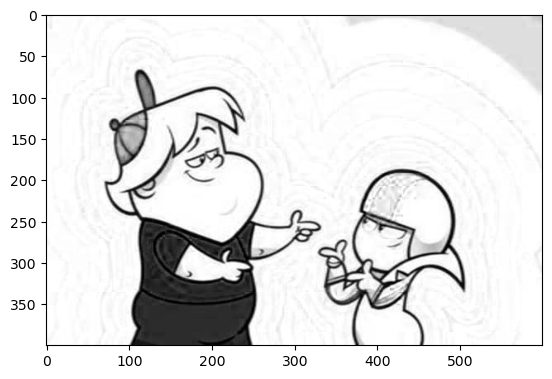

In [210]:
plt.imshow(x[:,:,0], cmap = "gray")

Далее я зануляю синий и зеленый каналы,чтобы проверить правильно ли я их вообще выделил.
Для примера возьму красный.

In [211]:
x_red = x.copy()

In [212]:
x_red[:,:,1] = 0 #обнуляем остальные каналы,то есть зеленый и синий
x_red[:,:,2] = 0

In [213]:
img_red = Image.fromarray(np.asarray(x_red, dtype=np.uint8))

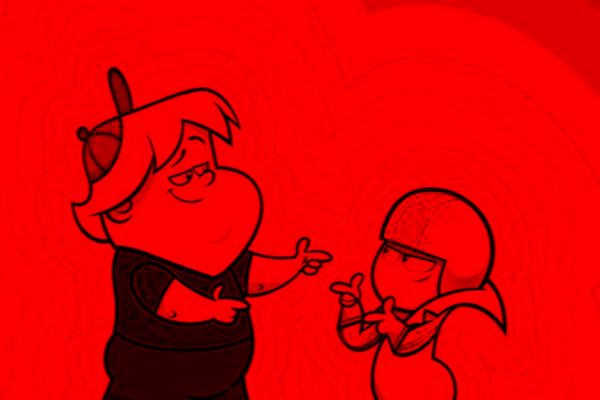

In [214]:
img_red

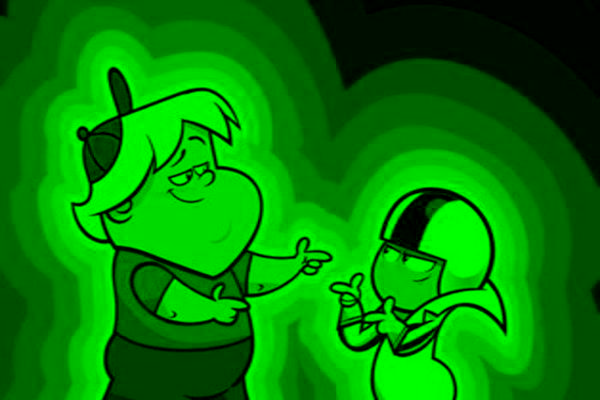

In [215]:
x_green = x.copy()
x_green[:,:,0] = 0 #зануляем первый и третий канал
x_green[:,:,2] = 0
img_green = Image.fromarray(np.asarray(x_green, dtype=np.uint8))
img_green

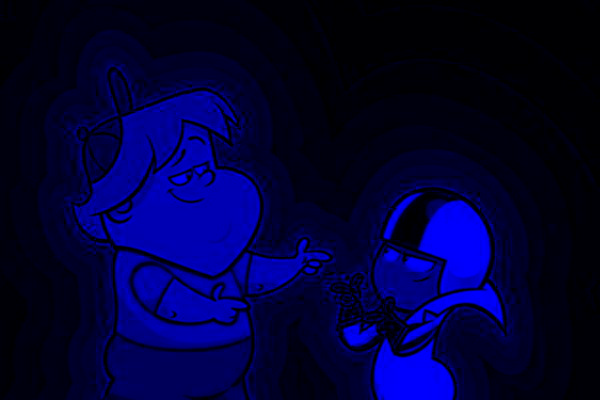

In [250]:
x_blue = x.copy()
x_blue[:,:,0] = 0 #зануляем второй и первый канал
x_blue[:,:,1] = 0
img_blue = Image.fromarray(np.asarray(x_blue, dtype=np.uint8))
img_blue

### It is okay :)
Все сделали верно.


In [251]:
U, S, Vt = np.linalg.svd(x[:,:,0], full_matrices=False) #разложение SVD


In [252]:
U.shape #Получили квадратную матрицу

(400, 400)

In [253]:
Vt.shape #маттрица уже транспонированная,поэтому еще раз транспонировать не надо 

(400, 600)

#### Ниже представлен логарифмический график матрицы S

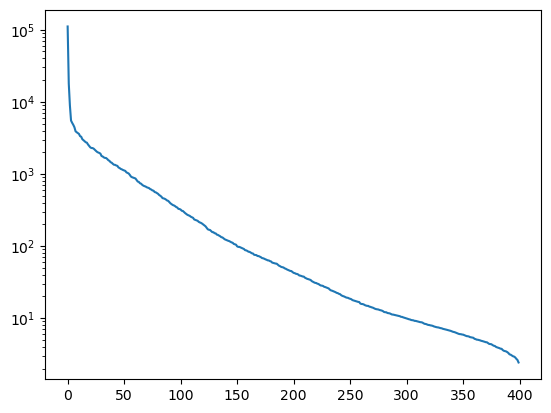

In [254]:
plt.plot(S)
plt.yscale("log") 

#### Необходимо проверить правильно ли мы вообще сделали svd разложение. Чтобы проверить,давайте перемножим наши матрицы S,U,Vt между собой через **.dot** и посмотри какая матрица получится на выходе.

In [255]:
U.dot(np.diag(S)).dot(Vt) 

array([[251., 248., 248., ..., 198., 197., 194.],
       [251., 248., 248., ..., 197., 197., 196.],
       [252., 250., 249., ..., 198., 197., 196.],
       ...,
       [245., 245., 246., ..., 255., 255., 255.],
       [244., 245., 247., ..., 255., 255., 255.],
       [243., 245., 249., ..., 255., 255., 255.]])

In [256]:
x[:,:,0] #наш исходный массив

array([[251., 248., 248., ..., 198., 197., 194.],
       [251., 248., 248., ..., 197., 197., 196.],
       [252., 250., 249., ..., 198., 197., 196.],
       ...,
       [245., 245., 246., ..., 255., 255., 255.],
       [244., 245., 247., ..., 255., 255., 255.],
       [243., 245., 249., ..., 255., 255., 255.]])

#### С помощью чудодейственной команды allclose - проверим совпадают ли наши матрицы. С точки зрения машинной точности все значения совершенно разные,но нас интересует апроксимация,в нашем случае числа целые части чисел.

In [257]:
np.allclose(U.dot(np.diag(S)).dot(Vt), x[:,:,0], atol = 1e-5)

True

#### Все работает :)

#### Все значения больше 255,которые не поместились на наш отрезочек,апроксемируем (или клипируем) до 255.

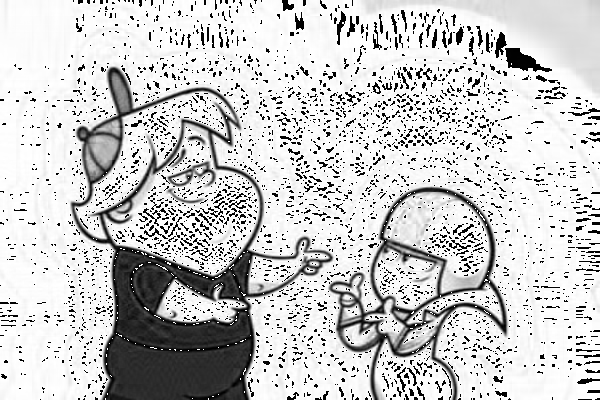

In [258]:
r = 100
y_r = U[:,:r].dot(np.diag(S[:r])).dot(Vt[:r,:])
img_y_r = Image.fromarray(np.asarray(y_r, dtype=np.uint8))

img_y_r


#### Такой результат получился без клипирования,чтож попробуем вывести результат с клипированием.

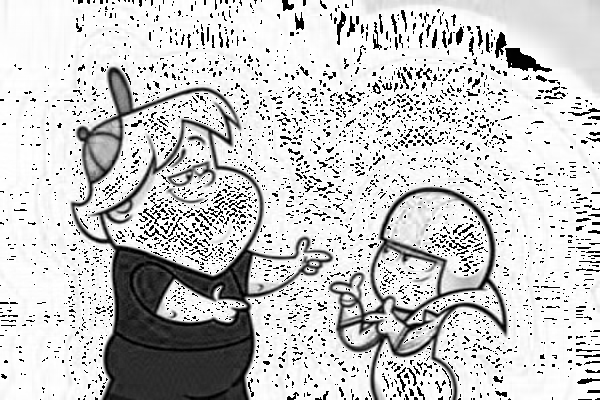

In [259]:
r = 100
y_r = U[:,:r].dot(np.diag(S[:r])).dot(Vt[:r,:])
y_r[y_r > 300] = 300
y_r[y_r < 0] = 0
img_y_r = Image.fromarray(np.asarray(y_r, dtype=np.uint8))
img_y_r

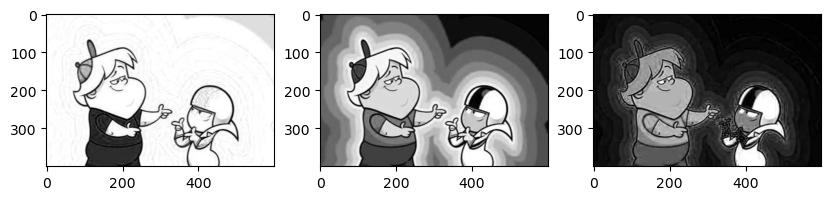

In [260]:
fig, axs = plt.subplots(1,3, figsize = (10,15))
axs[0].imshow(x[:,:,0], cmap = "gray")
axs[1].imshow(x[:,:,1], cmap = "gray")
axs[2].imshow(x[:,:,2], cmap = "gray")

plt.show()

In [261]:
U[:,:r].shape, S[:r].shape, Vt[:r,:].shape, U[:,:r].size + S[:r].size + Vt[:r, :].size

((400, 100), (100,), (100, 600), 100100)

In [262]:
np.save("U", U[:,:r])
np.save("S", S[:r])
np.save("Vt", Vt[r,:])

In [264]:
def reduce_rank(U, S, Vt, r):
    y_r = np.float32(U[:,:r])@(np.float32(np.diag(S[:r])))@(np.float32(Vt[:r,:]))
    y_r[y_r>255] = 255
    y_r[y_r<0] = 0
    img_y = np.asarray(y_r, dtype=np.uint8)
    return img_y

In [265]:
r = 100
U, S, Vt = np.linalg.svd(x[:,:,0], full_matrices = False)
rgb_red = reduce_rank(U, S, Vt, r)

U, S, Vt = np.linalg.svd(x[:,:,1], full_matrices = False)
rgb_green = reduce_rank(U, S, Vt, r)

U, S, Vt = np.linalg.svd(x[:,:,2], full_matrices = False)
rgb_blue = reduce_rank(U, S, Vt, r)

In [266]:
new = np.concatenate((rgb_red[:, :, np.newaxis], rgb_green[:, :, np.newaxis], rgb_blue[:, :, np.newaxis]), axis=-1)

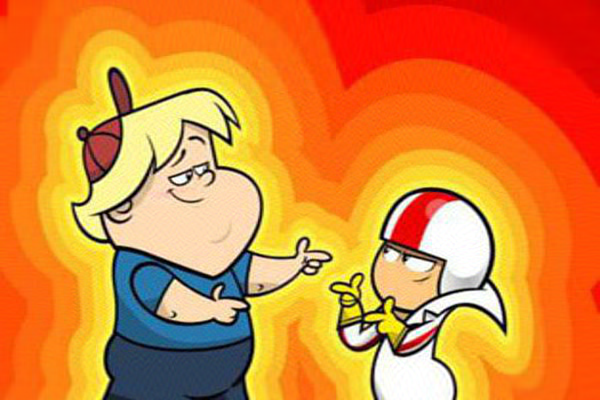

In [267]:
Image.fromarray(new)

In [269]:
Image.fromarray(new).save(f"kick_butowsky_new_{r=}.png")
